  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 44.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 23.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00:00:0100:01


/tmp/ipykernel_35/2336176896.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Song Name'] = df['Song Name'].fillna(method='ffill')


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

2025-06-30 13:21:05.477937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751289665.672562      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751289665.726715      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]


=== Elaborazione canzone 1: 000002.mp3 ===

Risposta generata dal modello:

RGB: (200, 100, 50) (180, 80, 30) (160, 70, 20) (190, 110, 40) (150, 85, 35)

RGB matches trovati: 5
Dettagli matches: [('200', '100', '50'), ('180', '80', '30'), ('160', '70', '20'), ('190', '110', '40'), ('150', '85', '35')]
Frammento 1: "rgb(200, 100, 50)"
Frammento 2: "rgb(180, 80, 30)"
Frammento 3: "rgb(160, 70, 20)"
Frammento 4: "rgb(190, 110, 40)"
Frammento 5: "rgb(150, 85, 35)"
Riga CSV: ['000002.mp3', '"rgb(200, 100, 50)"', '"rgb(180, 80, 30)"', '"rgb(160, 70, 20)"', '"rgb(190, 110, 40)"', '"rgb(150, 85, 35)"']

=== Elaborazione canzone 2: 000005.mp3 ===

Risposta generata dal modello:

RGB: (255, 102, 35) (170, 40, 10) (150, 100, 60) (255, 160, 50) (255, 150, 50)

RGB matches trovati: 5
Dettagli matches: [('255', '102', '35'), ('170', '40', '10'), ('150', '100', '60'), ('255', '160', '50'), ('255', '150', '50')]
Frammento 1: "rgb(255, 102, 35)"
Frammento 2: "rgb(170, 40, 10)"
Frammento 3: "rgb(150, 1

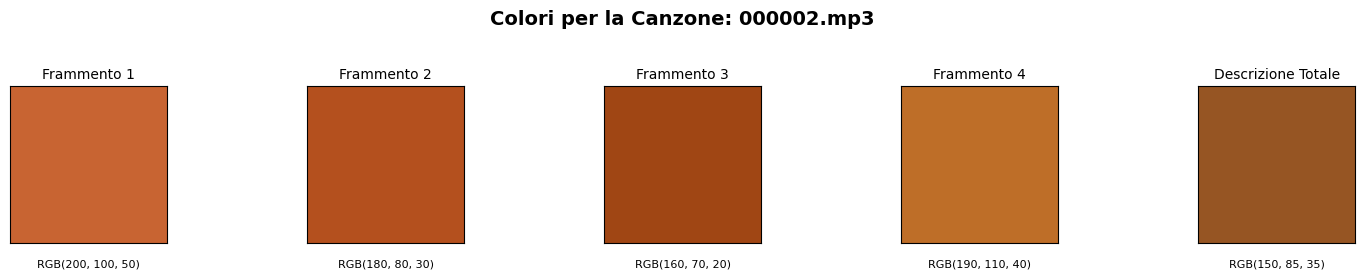

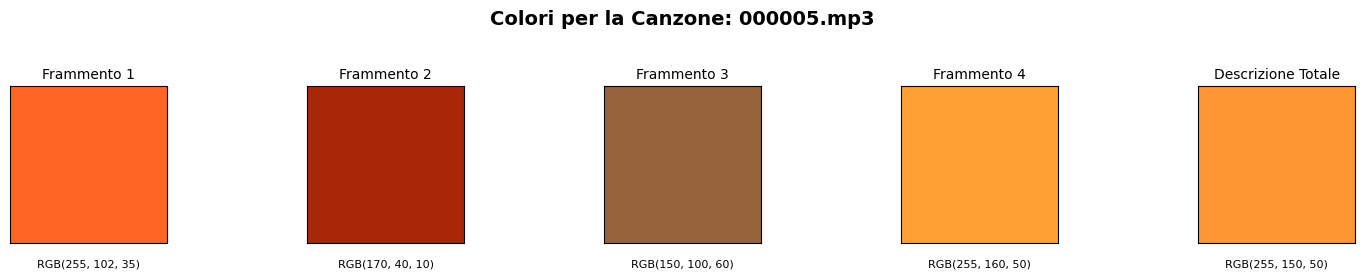

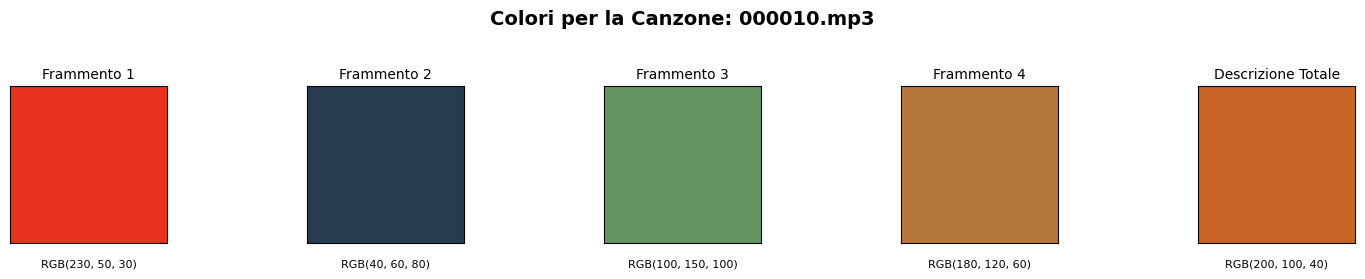


Visualizzazione completata. Modifica il parametro 'max_canzoni' per vederne di più.


In [1]:
# CALCOLO RGB PER CANZONI - VERSIONE CORRETTA
!pip install -q git+https://github.com/huggingface/transformers
!pip install -q qwen-omni-utils -U
!pip install -q bitsandbytes -U
!pip install -q accelerate
!pip install -q pandas
!pip install -q matplotlib # Aggiunto per la visualizzazione finale

# Import
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import re
import gc
import csv
import pandas as pd
import matplotlib.pyplot as plt

model_name = "Qwen/Qwen3-4B"

# --- Preparazione della lista dei prompt dal CSV ---
# Percorso del file CSV di input con le descrizioni
csv_file = "/kaggle/input/500-1000/audio_analysis_full_folder_500_1000.csv"
prompt_list = []
results_for_csv = []

try:
    # Leggiamo il CSV con pandas.
    df = pd.read_csv(csv_file, header=None)
    df.rename(columns={0: 'Song Name', 1: 'Description Type', 2: 'Description'}, inplace=True)

    # Riempi i valori NaN nella colonna 'Song Name' con il valore precedente
    df['Song Name'] = df['Song Name'].fillna(method='ffill')

    # Raggruppa i dati per Song Name e raccogli tutte le descrizioni
    for song_name, group in df.groupby('Song Name'):
        descriptions = {}
        for _, row in group.iterrows():
            desc_type = row['Description Type'].strip()
            desc_text = row['Description'].strip()
            descriptions[desc_type] = desc_text

        # Costruisci l'elenco delle descrizioni nell'ordine desiderato (Frammento 1-4, poi Totale)
        ordered_descriptions_content = []
        for i in range(1, 5): # Frammento 1 a 4
            content = descriptions.get(f'Fragment {i}', '')
            if content:
                ordered_descriptions_content.append({'label': f'Frammento {i}', 'content': content})

        # Aggiungi la descrizione totale per ultima
        overall_content = descriptions.get('Total', descriptions.get('Descrizione Totale', ''))
        if overall_content:
            ordered_descriptions_content.append({'label': 'Descrizione Totale', 'content': overall_content})

        # Assicurati di avere esattamente 5 descrizioni (4 frammenti + 1 totale)
        NUM_DESCRIPTIONS_EXPECTED = 5
        while len(ordered_descriptions_content) < NUM_DESCRIPTIONS_EXPECTED:
            ordered_descriptions_content.append({'label': 'Mancante', 'content': ''})

        # Costruisci il prompt per il modello
        prompt = f"Song Name: {song_name}\n\n"
        prompt += "Dati questi frammenti descrittivi di una canzone, valuta su una scala da 0 a 255 quanto ciascuno dei seguenti stati emotivi è evocato dalla descrizione:\n"
        prompt += "agitazione/movimento (R), calma (G), tristezza (B).\n\n"
        prompt += f"Restituisci **ESATTAMENTE {NUM_DESCRIPTIONS_EXPECTED} triple RGB COMPLETE**, una dopo l'altra, su una SINGOLA riga. \n"
        prompt += "Non includere nessuna spiegazione, numerazione, elenchi puntati o altro testo aggiuntivo. Non usare la modalità di pensiero ('thinking mode').\n"
        prompt += f"Inizia la riga con 'RGB:' e poi le {NUM_DESCRIPTIONS_EXPECTED} triple. Ogni tripla deve contenere esattamente tre valori separati da virgole.\n\n"
        prompt += "Ecco l'ESEMPIO ESATTO del formato desiderato (solo 5 triple complete, su una riga):\n"
        prompt += "RGB: (R1, G1, B1) (R2, G2, B2) (R3, G3, B3) (R4, G4, B4) (R5, G5, B5)\n\n"
        prompt += "Ecco i frammenti:\n"
        for item in ordered_descriptions_content:
            if item['content']:
                prompt += f"- {item['label']}: {item['content']}\n"
        
        prompt_list.append({'song_name': song_name, 'prompt_text': prompt})

except FileNotFoundError:
    print(f"Errore: Il file CSV '{csv_file}' non è stato trovato.")
    print("Assicurati che il file si trovi nel percorso specificato.")
    exit()
except Exception as e:
    print(f"Si è verificato un errore durante la lettura del CSV: {e}")
    print("Assicurati che le colonne siano presenti e accessibili con gli indici numerici corretti (0, 3, 4).")
    exit()

# --- Fine preparazione della lista dei prompt ---

# Parametri modello
compute_dtype = torch.float16

# Configurazione quantizzazione 4-bit
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=compute_dtype
)

# Caricamento tokenizer e modello
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    trust_remote_code=True,
    quantization_config=quant_config,
    device_map="auto",
    low_cpu_mem_usage=True,
    torch_dtype=compute_dtype
)

def extract_rgb_values(text):
    """
    Estrae i valori RGB dalla risposta del modello usando regex multiple per maggiore robustezza.
    Restituisce una lista di tuple (r, g, b).
    """
    # Pattern multipli per catturare diversi formati RGB
    patterns = [
        r"rgb\s*\(\s*(\d{1,3})\s*,\s*(\d{1,3})\s*,\s*(\d{1,3})\s*\)",  # rgb(r, g, b)
        r"\(\s*(\d{1,3})\s*,\s*(\d{1,3})\s*,\s*(\d{1,3})\s*\)",         # (r, g, b)
        r"(\d{1,3})\s*,\s*(\d{1,3})\s*,\s*(\d{1,3})",                   # r, g, b
        r"R:\s*(\d{1,3})\s*G:\s*(\d{1,3})\s*B:\s*(\d{1,3})",            # R: r G: g B: b
    ]
    
    found_matches = []
    
    for pattern in patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        if matches:
            found_matches.extend(matches)
            break  # Usa il primo pattern che trova risultati
    
    # Se non trova nulla, prova a estrarre solo numeri consecutivi (fallback)
    if not found_matches:
        numbers = re.findall(r'\b(\d{1,3})\b', text)
        if len(numbers) >= 15:  # Almeno 15 numeri per 5 triple RGB
            # Raggruppa in triple di 3
            for i in range(0, min(15, len(numbers)), 3):
                if i + 2 < len(numbers):
                    found_matches.append((numbers[i], numbers[i+1], numbers[i+2]))
    
    return found_matches

def validate_and_clamp_rgb(rgb_tuple):
    """
    Valida e limita i valori RGB nell'intervallo 0-255.
    """
    try:
        r, g, b = int(rgb_tuple[0]), int(rgb_tuple[1]), int(rgb_tuple[2])
        r = max(0, min(255, r))
        g = max(0, min(255, g))
        b = max(0, min(255, b))
        return (r, g, b)
    except (ValueError, IndexError):
        return (0, 0, 0)  # Valore di default in caso di errore

# Loop sui prompt
for idx, entry in enumerate(prompt_list, start=1):
    song_name = entry['song_name']
    prompt_text = entry['prompt_text']

    print(f"\n=== Elaborazione canzone {idx}: {song_name} ===\n")

    chat = [{"role": "user", "content": prompt_text}]
    chat_text = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True, enable_thinking=False)

    inputs = tokenizer(chat_text, return_tensors="pt", truncation=True, max_length=2048)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    outputs = model.generate(
        **inputs,
        max_new_tokens=256,
        do_sample=True,
        temperature=0.7,
        num_return_sequences=1,
    )

    response_text = tokenizer.decode(outputs[0][inputs["input_ids"].shape[1]:], skip_special_tokens=True).strip()
    print("Risposta generata dal modello:\n")
    print(response_text)
    print("\n" + "="*50)

    # --- PARSING RGB MIGLIORATO ---
    found_rgb_matches = extract_rgb_values(response_text)
    
    print(f"RGB matches trovati: {len(found_rgb_matches)}")
    print(f"Dettagli matches: {found_rgb_matches}")

    # Inizializza la riga per il CSV con il nome della canzone
    current_song_rgb_values = [song_name]

    # Popola esattamente 5 valori RGB (4 frammenti + Totale)
    NUM_EXPECTED_RGB = 5
    for i in range(NUM_EXPECTED_RGB):
        if i < len(found_rgb_matches):
            r, g, b = validate_and_clamp_rgb(found_rgb_matches[i])
            rgb_string = f'"rgb({r}, {g}, {b})"'  # Formato con virgolette per CSV
            current_song_rgb_values.append(rgb_string)
            print(f"Frammento {i+1}: {rgb_string}")
        else:
            # Valore di default se non c'è abbastanza dati
            default_rgb = '"rgb(100, 100, 100)"'  # Grigio neutro
            current_song_rgb_values.append(default_rgb)
            print(f"Frammento {i+1} (default): {default_rgb}")

    # Verifica che abbiamo esattamente 6 elementi (nome + 5 RGB)
    if len(current_song_rgb_values) != 6:
        print(f"ERRORE: Numero di elementi errato per {song_name}: {len(current_song_rgb_values)}")
        # Forza a 6 elementi
        while len(current_song_rgb_values) < 6:
            current_song_rgb_values.append('"rgb(100, 100, 100)"')
        current_song_rgb_values = current_song_rgb_values[:6]  # Taglia se troppo lungo

    results_for_csv.append(current_song_rgb_values)
    print(f"Riga CSV: {current_song_rgb_values}")

    # Pulisci la memoria GPU e CPU dopo ogni elaborazione
    del inputs, outputs
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()
    gc.collect()

# --- Salvataggio finale dei dati ---

print("\n--- Salvataggio dei colori RGB in CSV ---")
output_csv_file = "valutazione_rgb_segmenti.csv"
# L'header ora riflette esattamente il formato desiderato
csv_header = ['Song Name', 'Frammento 1', 'Frammento 2', 'Frammento 3', 'Frammento 4', 'Descrizione Totale']

try:
    with open(output_csv_file, mode='w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(csv_header)
        writer.writerows(results_for_csv)
    
    print(f"Colori RGB salvati in '{output_csv_file}'")
    
    # Verifica del file salvato
    print(f"\nVerifica del file salvato:")
    with open(output_csv_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        print(f"Numero di righe totali: {len(lines)}")
        print(f"Header: {lines[0].strip()}")
        if len(lines) > 1:
            print(f"Prima riga dati: {lines[1].strip()}")
        if len(lines) > 2:
            print(f"Seconda riga dati: {lines[2].strip()}")

except Exception as e:
    print(f"Errore durante il salvataggio del CSV: {e}")

print("\nProcessing complete. I valori RGB sono stati salvati nel file CSV.")

# --- Parte di visualizzazione (con matplotlib) ---
def parse_rgb_to_normalized_tuple(rgb_string):
    """
    Converte una stringa come "rgb(r, g, b)" o "rgb(r, g, b)" in una tupla di float (r, g, b)
    normalizzati nell'intervallo [0, 1] per matplotlib.
    """
    try:
        # Rimuovi virgolette se presenti
        rgb_string = rgb_string.strip('"\'')
        numeri = re.findall(r'\d+', rgb_string)
        if len(numeri) == 3:
            r = int(numeri[0]) / 255.0
            g = int(numeri[1]) / 255.0
            b = int(numeri[2]) / 255.0
            return (r, g, b)
        else:
            return (0.4, 0.4, 0.4)  # Grigio di default
    except (ValueError, IndexError):
        return (0.4, 0.4, 0.4)  # Grigio di default

def visualizza_colori_canzoni(nome_file_csv, max_canzoni=5):
    """
    Legge un file CSV e visualizza i colori per ogni canzone usando matplotlib.
    Mostra una finestra per ogni canzone, una alla volta.
    """
    try:
        with open(nome_file_csv, mode='r', newline='', encoding='utf-8') as file:
            lettore_csv = csv.reader(file)
            header = next(lettore_csv) # Salta l'intestazione

            print(f"\nSto per visualizzare i colori delle prime {max_canzoni} canzoni dal file CSV generato.")
            print("Chiudi ogni finestra per procedere alla successiva.")

            canzoni_visualizzate = 0
            for riga in lettore_csv:
                if not riga or len(riga) < 6:
                    continue

                if canzoni_visualizzate >= max_canzoni:
                    print(f"\nVisualizzazione completata. Modifica il parametro 'max_canzoni' per vederne di più.")
                    break

                nome_canzone = riga[0]
                # Prendiamo 5 stringhe di colore: 4 frammenti + Totale
                colori_stringa = riga[1:6] # Indici da 1 a 5 per 5 colonne

                colori = [parse_rgb_to_normalized_tuple(s) for s in colori_stringa]
                
                # Crea la figura e i subplot (1 riga, 5 colonne)
                fig, axes = plt.subplots(1, 5, figsize=(15, 3))
                fig.suptitle(f"Colori per la Canzone: {nome_canzone}", fontsize=14, fontweight='bold')

                # Definisce i titoli per ogni riquadro (4 frammenti + Totale)
                titoli = [f"Frammento {i+1}" for i in range(4)] + ["Descrizione Totale"]

                for ax, colore, titolo in zip(axes, colori, titoli):
                    ax.imshow([[colore]])
                    ax.set_title(titolo, fontsize=10)
                    ax.set_xticks([])
                    ax.set_yticks([])
                    # Aggiungi il valore RGB come testo
                    rgb_text = f"RGB({int(colore[0]*255)}, {int(colore[1]*255)}, {int(colore[2]*255)})"
                    ax.text(0.5, -0.1, rgb_text, ha='center', va='top', transform=ax.transAxes, fontsize=8)

                plt.tight_layout(rect=[0, 0.1, 1, 0.9])
                plt.show()

                canzoni_visualizzate += 1

    except FileNotFoundError:
        print(f"ERRORE: Il file '{nome_file_csv}' non è stato trovato.")
    except Exception as e:
        print(f"Si è verificato un errore durante la visualizzazione: {e}")

# --- ESECUZIONE DELLA VISUALIZZAZIONE ---
print(f"\n{'='*60}")
print("ESECUZIONE VISUALIZZAZIONE")
print(f"{'='*60}")

try:
    visualizza_colori_canzoni(output_csv_file, max_canzoni=3)
except Exception as e:
    print(f"Errore durante la visualizzazione: {e}")